In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

import json

path = Path.cwd()/'logs/wikitext103'
path

from numpy import array

import matplotlib.patches as mpatches

In [2]:
logfiles = [f for f in path.iterdir() if '.DS_Store' not in f.name]
logfiles

[PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_1e-05_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/RAdam_1e-05_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdamW_1e-07_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdamW_1e-06_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdamW_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_1e-07_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_1e-06_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_1e-07_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_1e-06_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/RAdam_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_1e-05_103.json'),


In [3]:
def get_meta(filepath):
    optim = filepath.stem.split('_')[0]
    lr = float(filepath.stem.split('_')[1])
    return optim, lr

class Log:
    def __init__(self, filePath):
        self.filePath = filePath
        self.open_file()
#         self.process_raw()
        self.get_accs()
        
    def process_raw(self):
        self.log = self.log.split('\n')
        self.log = [l for l in self.log if 'acc' in l]
        self.log = [d.split(',')[:3] for d in self.log]
    
    def open_file(self):
        with open(self.filePath, 'r') as f:
            self.log = json.load(f)
            self.optim = self.filePath.stem.split('_')[0]
            self.lr = float(self.filePath.stem.split('_')[1])
    def get_accs(self):
        self.train_losses = array(self.log['train_losses'])
        self.val_ppls = array(self.log['val_ppls'])
        self.test_ppls = array(self.log['test_ppls'])
        self.epoch = array(range(len(self.train_losses)))
#         self.best_epoch = self.log['best_epoch']
        self.best_epoch = self.val_ppls.argmin()
        self.best_val_ppl = self.val_ppls.min()
        self.best_train_loss = self.train_losses.min()
        self.best_test_ppl = self.test_ppls[self.best_epoch]
        

def min_epoch(logs):
    mini = float('inf')
    for optim, log in logs.items():
        for lr, lo in log.items():
            if len(lo.epoch)<mini: 
#                 if optim=='AdaBelief' and lr==0.0001: continue
                mini=len(lo.epoch)
                lagger = (optim,lr)
    return mini, lagger

In [4]:
logfiles

[PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_1e-05_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/RAdam_1e-05_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdamW_1e-07_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdamW_1e-06_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdamW_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_1e-07_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_1e-06_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_1e-07_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/Agg_1e-06_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/RAdam_0.0001_103.json'),
 PosixPath('/Users/davoodwadi/code/logs/wikitext103/AdaBelief_1e-05_103.json'),


In [5]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

mini, lagger = min_epoch(logs)
mini, lagger

(34, ('Agg', 0.0001))

## testing grouped plots

In [31]:
logs

defaultdict(dict,
            {'Agg': {0.0001: <__main__.Log at 0x7fefe85ffb80>,
              1e-05: <__main__.Log at 0x7fefe85ffbb0>,
              1e-07: <__main__.Log at 0x7fefe9592370>,
              1e-06: <__main__.Log at 0x7fefe9592610>},
             'RAdam': {1e-05: <__main__.Log at 0x7fefe7ebf7f0>,
              0.0001: <__main__.Log at 0x7fefe94ab970>,
              1e-07: <__main__.Log at 0x7fefe95ad310>,
              1e-06: <__main__.Log at 0x7fefe8ce9d00>},
             'AdamW': {1e-07: <__main__.Log at 0x7fefe91edc10>,
              1e-06: <__main__.Log at 0x7fefe937b550>,
              0.0001: <__main__.Log at 0x7fefe7ebf340>,
              1e-05: <__main__.Log at 0x7fefe95ad520>},
             'AdaBelief': {0.0001: <__main__.Log at 0x7fefe7ebffa0>,
              1e-07: <__main__.Log at 0x7fefe9414fd0>,
              1e-06: <__main__.Log at 0x7fefe930ac40>,
              1e-05: <__main__.Log at 0x7fefe94ab910>}})

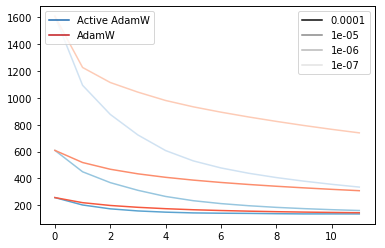

In [18]:
start = 0
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,4))
colors = ['b', 'r', 'g', ]
styles = ['-', '--', '-.']
markers=['P','.']
optims=['Active AdamW', 'AdamW']
cs = {'Active AdamW': Blues, 'AdamW':Reds}
optim = 'Agg'
lrs=[0.0001,1e-05, 1e-6, 1e-7]
# p1 = ax.plot(logs[optim][lrs[0]].test_ppls[:mini], color=Blues(250),)
p2 = ax.plot(logs[optim][lrs[1]].test_ppls[start:mini], color=Blues(140), )
p3 = ax.plot(logs[optim][lrs[2]].test_ppls[start:mini], color=Blues(100), )
p4 = ax.plot(logs[optim][lrs[3]].test_ppls[start:mini], color=Blues(50), )

# ax.fill_between(range(mini), logs[optim][lrs[0]].test_ppls[:mini], logs[optim][lrs[3]].test_ppls[:mini], alpha=.25, color=Blues(200))

optim = 'AdamW'
# p4 = ax.plot(logs[optim][lrs[0]].test_ppls[:mini], color=Reds(250))
p5 = ax.plot(logs[optim][lrs[1]].test_ppls[start:mini], color=Reds(140))
p6 = ax.plot(logs[optim][lrs[2]].test_ppls[start:mini], color=Reds(100))
p7 = ax.plot(logs[optim][lrs[3]].test_ppls[start:mini], color=Reds(50))
p8, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(250))
p9, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(140))
p10, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(100))
p11, = ax.plot(np.NaN, np.NaN, label=lrs[0], c=Greys(50))

# ax.fill_between(range(mini), logs[optim][lrs[0]].test_ppls[:mini], logs[optim][lrs[3]].test_ppls[:mini], alpha=.25, color=Reds(200))

ax.legend([p8,p9,p10,p11], lrs)

ax2 = ax.twinx()
for ss, optim in enumerate(optims):

    ax2.plot(np.NaN, np.NaN, c=cs[optim](200), label=optim)
ax2.get_yaxis().set_visible(False)
ax2.legend(loc='upper left')

## average and std of accuracy for each optimizer

In [6]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

mini, lagger = min_epoch(logs)
mini, lagger

(34, ('Agg', 0.0001))

In [7]:
for optim in logs.keys():
#     if optim=='AdaBelief' or optim=='RAdam': continue
    lr1 = logs[optim][0.0001].train_losses[:mini]
    lr2 = logs[optim][1e-5].train_losses[:mini]
    lr3 = logs[optim][1e-6].train_losses[:mini]
    lr4 = logs[optim][1e-7].train_losses[:mini]
    lrs = np.stack([lr1,lr2,lr3, lr4])
#     lrs = np.stack([lr1,lr2,lr3])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    logs[optim]['min'] = lrs.min(0)
    logs[optim]['max'] = lrs.max(0)
    
#     print(lrs.shape)
#     print(logs[optim])

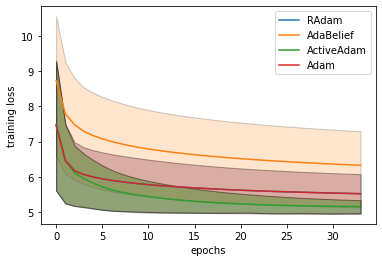

In [8]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
for i, optim in enumerate(['RAdam', "AdaBelief", 'Agg', 'AdamW']):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    minn = logs[optim]['min']
    maxx = logs[optim]['max']
    label = optim
    if optim=='AdamW': label='Adam'
    if optim=='Agg': label='ActiveAdam'
    l, = ax.plot(mean, label=label)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.2
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), minn, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('training loss')
# ax.set_ylim(top=9, bottom=4.9)
ax.legend()

In [9]:
path = Path.cwd()
path

PosixPath('/Users/davoodwadi/code')

In [10]:
fig.savefig(path/'plots/wikitext103_loss.png', dpi=300, bbox_inches='tight')

PPLs

In [11]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

mini, lagger = min_epoch(logs)
mini, lagger

(34, ('Agg', 0.0001))

In [12]:
mini=34

In [13]:
for optim in logs.keys():
#     if optim=='AdaBelief' or optim=='RAdam': continue
    lr1 = logs[optim][0.0001].val_ppls[:mini]
    lr2 = logs[optim][1e-5].val_ppls[:mini]
    lr3 = logs[optim][1e-6].val_ppls[:mini]
    lr4 = logs[optim][1e-7].val_ppls[:mini]
    lrs = np.stack([lr1,lr2,lr3, lr4])
#     lrs = np.stack([lr1,lr2,lr3])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    logs[optim]['min'] = lrs.min(0)
    logs[optim]['max'] = lrs.max(0)
    
#     print(lrs.shape)
#     print(logs[optim])

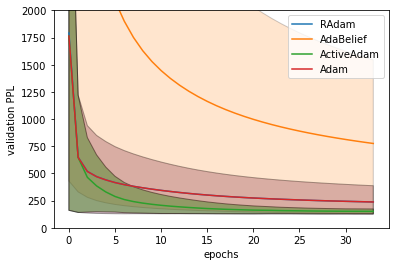

In [14]:
fig, ax = plt.subplots(1,1, sharey=True)
hatches = {
    'Agg': '*',
    'Adabelief': '.',
    'AdamW': '|',
    'RAdam': 'X'
}
for i, optim in enumerate(['RAdam', "AdaBelief", 'Agg', 'AdamW']):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    minn = logs[optim]['min']
    maxx = logs[optim]['max']
    label = optim
    if optim=='AdamW': label='Adam'
    if optim=='Agg': label='ActiveAdam'
    l, = ax.plot(mean, label=label)
    color = l.get_color()
    if optim=='Agg':
        alpha=.5
    else:
        alpha=.2
#     ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    ax.fill_between(range(mini), minn, mean+std, alpha=alpha, edgecolor='black', facecolor=color)
ax.set_xlabel('epochs')
ax.set_ylabel('validation PPL')
ax.set_ylim(top=2000, bottom=0)
ax.legend()

In [15]:
fig.savefig(path/'plots/wikitext103_valppl.png', dpi=300, bbox_inches='tight')

Best test ppl

In [16]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

mini, lagger = min_epoch(logs)
mini, lagger

(34, ('Agg', 0.0001))

In [58]:
mini=34

In [17]:
for optim in logs.keys():
#     if optim=='AdaBelief' or optim=='RAdam': continue
    lr1 = logs[optim][0.0001].test_ppls[logs[optim][0.0001].best_epoch]
    lr2 = logs[optim][1e-5].test_ppls[logs[optim][1e-5].best_epoch]
    lr3 = logs[optim][1e-6].test_ppls[logs[optim][1e-6].best_epoch]
    lr4 = logs[optim][1e-7].test_ppls[logs[optim][1e-7].best_epoch]
    lrs = np.stack([lr1,lr2,lr3, lr4])
#     lrs = np.stack([lr1,lr2,lr3])
    logs[optim]['best_test_ppl'] = lrs
#     logs[optim]['std'] = lrs.std(0)
#     logs[optim]['min'] = lrs.min(0)
#     logs[optim]['max'] = lrs.max(0)
    
#     print(lrs.shape)
#     print(logs[optim])

In [18]:
test_ppls=[]
for optim in ['Agg', 'AdamW','RAdam', "AdaBelief"]:
    test_ppls.append(logs[optim]['best_test_ppl'])
test_ppls = np.array(test_ppls).T
test_ppls

array([[ 144.9843665 ,  130.94773811,  131.7870601 ,  122.63631356],
       [ 132.10088391,  128.88156364,  127.58484391,  251.99876596],
       [ 134.24299153,  197.00824162,  193.9932218 ,  605.1224255 ],
       [ 172.10999096,  464.44954406,  457.00631465, 1870.61997486]])

Text(0, 0.5, 'best test PPL')

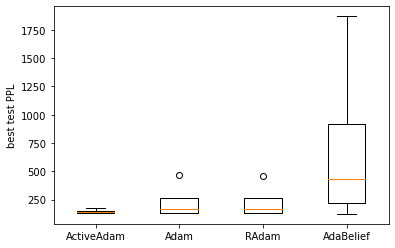

In [19]:
fig, ax = plt.subplots(1,1, sharey=True)
ax.boxplot(test_ppls, labels=['ActiveAdam', 'Adam','RAdam', "AdaBelief"])
# ax.legend()
ax.set_ylabel("best test PPL")


Text(0, 0.5, 'best test PPL')

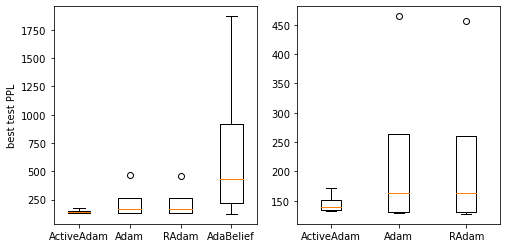

In [24]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].boxplot(test_ppls, labels=['ActiveAdam', 'Adam','RAdam', "AdaBelief"])
ax[1].boxplot(test_ppls[:,:3], labels=['ActiveAdam', 'Adam','RAdam'])
# ax.legend()
ax[0].set_ylabel("best test PPL")


In [25]:
fig.savefig(path/'plots/wikitext103_test3.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'best test PPL')

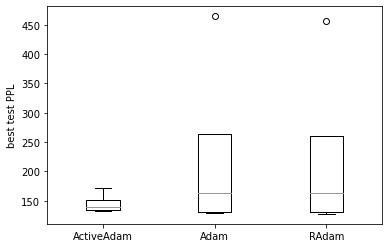

In [21]:
fig, ax = plt.subplots(1,1, sharey=True)
ax.boxplot(test_ppls[:,:3], labels=['ActiveAdam', 'Adam','RAdam'])
# ax.legend()
ax.set_ylabel("best test PPL")


In [22]:
fig.savefig(path/'plots/wikitext103_test2.png', dpi=300, bbox_inches='tight')

## plots

In [22]:
logs = defaultdict(dict)
for file in logfiles:
    optim, lr = get_meta(file)
    logs[optim][lr] = Log(file)

mini = min_epoch(logs)
mini

(20, ('AdaBelief', 0.0001))

In [28]:
mini = 34

/Users/davoodwadi/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


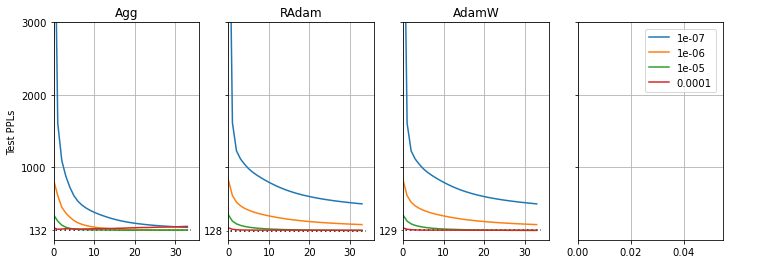

In [29]:
start = 0
fig, axes = plt.subplots(1,4, sharey=False, figsize=(12,4))
for i, (ax, optim) in enumerate(zip(axes, logs.keys())):
    min_y = float('inf')
    for lr in sorted(logs[optim].keys()):
        if optim=='AdaBelief': continue
#         if lr==1e-6: continue
        
        min_y = min(min_y, min(logs[optim][lr].test_ppls))
        ax.plot(logs[optim][lr].test_ppls[start:mini], label=lr)
        ax.set_title(optim)
    ax.set_yticks([min_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
    ax.hlines(min_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0, top=3000)
    ax.set_yticks([]+list(np.arange(1000,4000,1000)))
    ax.grid(b=True)
#     if optim=='AdaBelief':
#         ax.set_yticks([]+list(np.arange(5000,33000,5000)))
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.85,.65))
        ax.set_ylabel('Test PPLs')
    if i!=0:
        ax.set_yticklabels([])

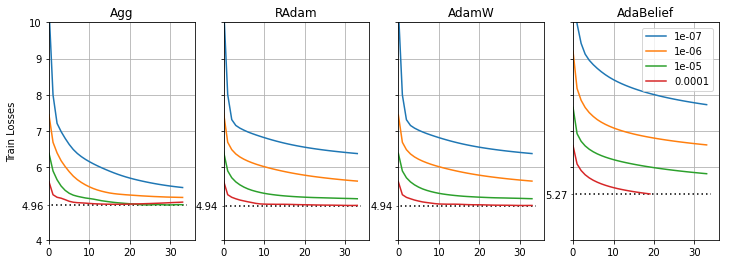

In [30]:
fig, axes = plt.subplots(1,4, sharey=False, figsize=(12,4))
for i, (ax, optim) in enumerate(zip(axes, logs.keys())):
    min_y = float('inf')
    for lr in sorted(logs[optim].keys()):
        min_y = min(min_y, min(logs[optim][lr].train_losses))
        ax.plot(logs[optim][lr].train_losses[:mini], label=lr)
        ax.set_title(optim)
        ax.grid(b=True)
    ax.set_yticks([min_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(min_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=4, top=10)
    ax.set_yticks([4]+list(np.arange(6,11,1)))
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.851,.655))
        ax.set_ylabel('Train Losses')
    if i!=0:
        ax.set_yticklabels([])
        

In [26]:
mini=34

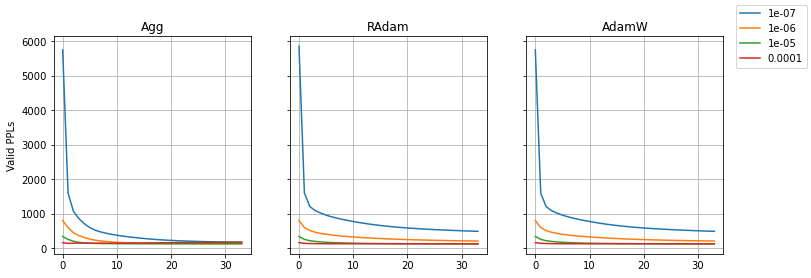

In [27]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(12,4))
for i, (ax, optim) in enumerate(zip(axes, logs.keys())):
    for lr in sorted(logs[optim].keys()):
#         if lr==1e-7: continue
        if optim=='AdaBelief': continue
        ax.plot(logs[optim][lr].val_ppls[:mini], label=lr)
        ax.set_title(optim)
        ax.grid(b=True)
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')
        ax.set_ylabel('Valid PPLs')

In [31]:
for optim in logs.keys():
    for lr in sorted(logs[optim].keys()):
        print(f'{optim}, {lr}, best test PPL: {logs[optim][lr].best_test_ppl}')

Agg, 1e-07, best test PPL: 172.10999095533322
Agg, 1e-06, best test PPL: 134.19031995103663
Agg, 1e-05, best test PPL: 132.10088390805728
Agg, 0.0001, best test PPL: 144.98436649645404
RAdam, 1e-07, best test PPL: 457.00631464584995
RAdam, 1e-06, best test PPL: 193.9932218041967
RAdam, 1e-05, best test PPL: 127.58484390644642
RAdam, 0.0001, best test PPL: 131.23715813771622
AdamW, 1e-07, best test PPL: 464.4495440627058
AdamW, 1e-06, best test PPL: 197.008241621903
AdamW, 1e-05, best test PPL: 128.8815636381791
AdamW, 0.0001, best test PPL: 130.91752027621249
AdaBelief, 1e-07, best test PPL: 1870.6199748603497
AdaBelief, 1e-06, best test PPL: 605.1224255025853
AdaBelief, 1e-05, best test PPL: 251.9987659614954
AdaBelief, 0.0001, best test PPL: 148.91867115861106


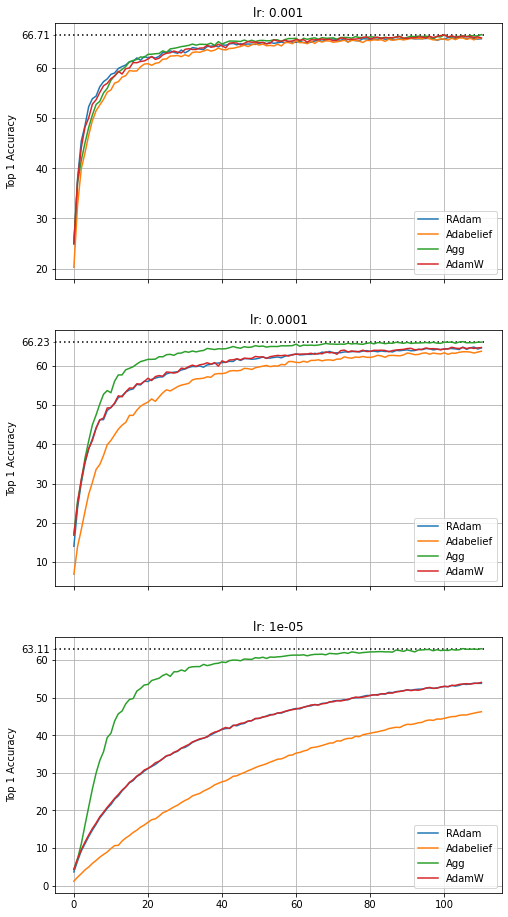

In [28]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,16))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[1:], axes)):
    max_y = 0
    for optim in logs.keys():
        ax.plot(logs[optim][lr].acc1[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = max(max(logs[optim][lr].acc1[:mini]), max_y)
        
        ax.legend(loc='lower right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Top 1 Accuracy')
# plt.tight_layout()

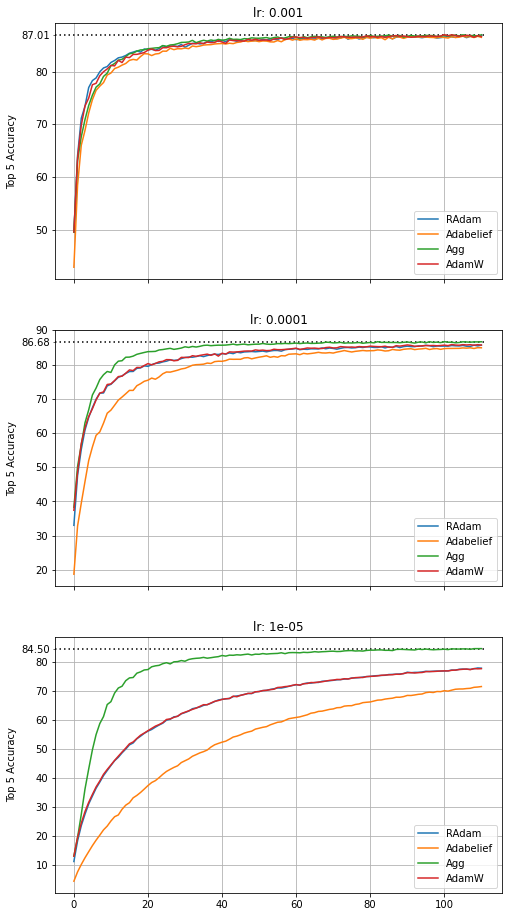

In [29]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,16))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[1:], axes)):
    max_y = 0
    for optim in logs.keys():
        ax.plot(logs[optim][lr].acc5[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = max(max(logs[optim][lr].acc5[:mini]), max_y)
        
        ax.legend(loc='lower right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Top 5 Accuracy')
# plt.tight_layout()

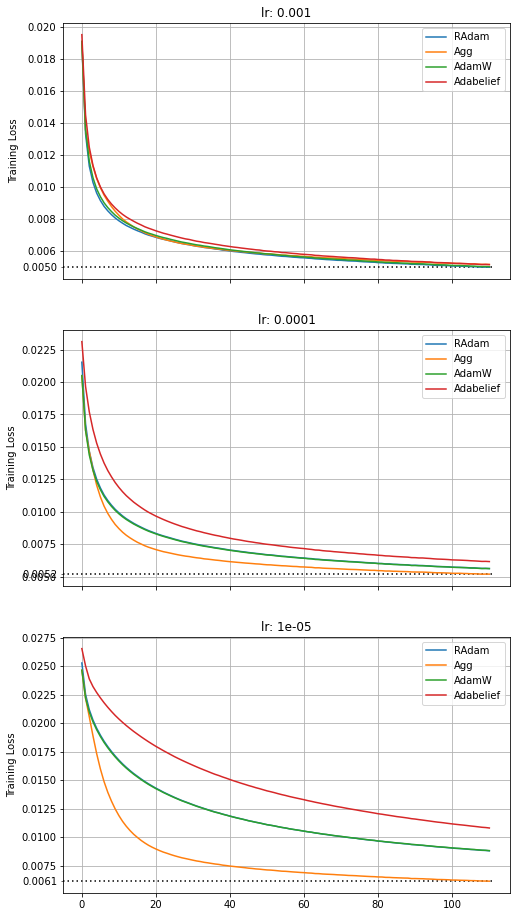

In [30]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(8,16))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[1:], axes)):
    max_y = float('inf')
    for optim in sorted(logs.keys(), reverse=True):
        ax.plot(logs[optim][lr].train_loss[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = min(min(logs[optim][lr].train_loss[:mini]), max_y)
        
        ax.legend(loc='upper right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.4f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Training Loss')
# plt.tight_layout()

In [36]:
list(zip(logs['RAdam'][0.0001].train_loss, logs['AdamW'][0.0001].train_loss, logs['Adabelief'][0.0001].train_loss))

[(0.021530205383896828, 0.020501941442489624, 0.02311607450246811),
 (0.01677325740456581, 0.016273880377411842, 0.019662216305732727),
 (0.014681334607303143, 0.014384233392775059, 0.017712412402033806),
 (0.013411135412752628, 0.01319710910320282, 0.016348546370863914),
 (0.012511095032095909, 0.01233967300504446, 0.015288508497178555),
 (0.011838128790259361, 0.011704323813319206, 0.014450193382799625),
 (0.011295048519968987, 0.011181131936609745, 0.013753686100244522),
 (0.010868927463889122, 0.01076596975326538, 0.01317605935037136),
 (0.01050625927746296, 0.010411819443106651, 0.012691284529864788),
 (0.010187214240431786, 0.010102984495460987, 0.012253097258508205),
 (0.00991998054087162, 0.00984075665473938, 0.011875037103891373),
 (0.009675402194261551, 0.00960603728890419, 0.011539541184902191),
 (0.009463975206017494, 0.009402451105415821, 0.011240732856094837),
 (0.00928279384970665, 0.009222583845257759, 0.010984605178236961),
 (0.009108571335673332, 0.009051894769072533,

In [35]:
logs['Adabelief']

{0.001: <__main__.Log at 0x7fe96ce77390>,
 1e-05: <__main__.Log at 0x7fe96dd1e2d0>,
 0.0001: <__main__.Log at 0x7fe96f340390>}